In [70]:
import numpy as np
from SALib.sample import fast_sampler
from SALib.analyze import sobol
from SALib.analyze import fast
import matplotlib.pyplot as plt
from SALib import ProblemSpec
from SALib.sample import saltelli

##########################
#http0.1://salib.readthedocs.io/en/latest/basics_with_interface.html
##########################
import sys
import os
sys.path.insert(0, os.path.abspath('../model'))
import Pacejka52 as pa52
import Pacejka52_Sv_Sh_0 as pa52_0
import Pacejka52_params_comp as pa52pa

Text(0, 0.5, 'Fy [N]')

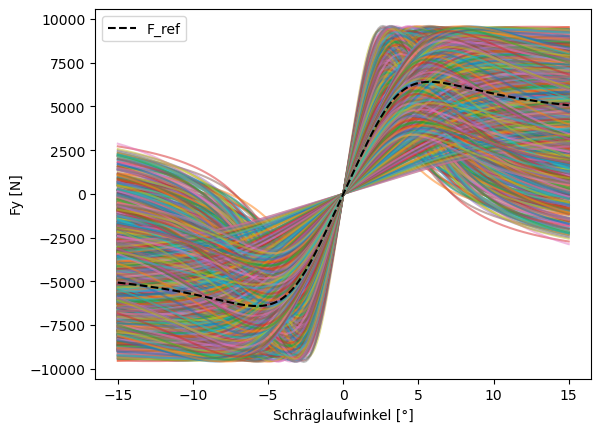

In [71]:
# fast sampler


#MF simple params Indy Fz = 4000
Fz = 4000
Sy = np.linspace(-0.3,0.3,200)
Sy_plt = np.linspace(-15,15,200)
s=0.5
problem_indy = {
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[-9.10763555 * (1+s),-9.10763555 * (1-s)], [1.5991035* (1-s), 1.5991035* (1+s)], 
            [-1.60244708* (1+s), -1.60244708* (1-s)], [-1.89562919* (1+s), -1.89562919* (1-s)]],
    #'bounds': [[4,12], [1,2], [0.1,1.9], [-10,1]]
}

X = fast_sampler.sample(problem_indy, 500)

for i in range(0,len(X)):
    params_sample = [X[i,0], X[i,1], X[i,2], X[i,3]]
    F = pa52.Pacejka5_lat_pa(Sy,Fz, *params_sample)
    plt.plot(Sy_plt,F, alpha=0.5)

#Refernzkurve
F_ref = pa52.Pacejka5_lat_pa(Sy,Fz,-9.10763555 ,1.5991035, -1.60244708, -1.89562919)
plt.plot(Sy_plt,F_ref, 'k--', label = 'F_ref')
plt.legend(loc = 'upper left')
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')


Text(0, 0.5, 'Fx [N]')

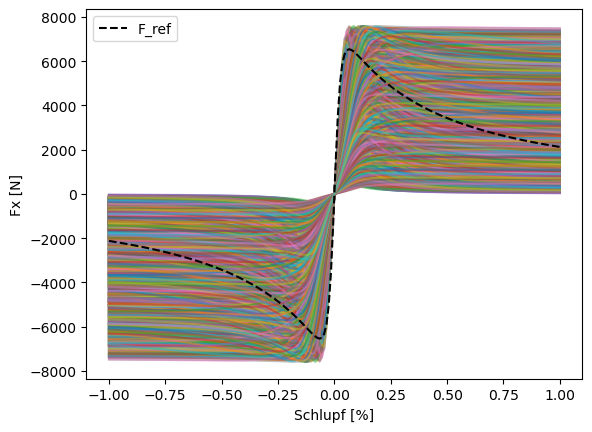

In [30]:
# fast sampler


#MF simple params long Indy Fz = 4000
Fz = 4000
Sx = np.linspace(-1,1,200)

s=0.2
problem_indy = {
    'num_vars': 4,
    'names': ['B', 'C', 'D', 'E'],
    'bounds': [[19.7526835 * (1-s),19.7526835 * (1+s)], [1.99999146 * (1-s), 1.99999146 * (1+s)], 
           [1.63455163* (1-s), 1.63455163* (1+s)], [0.75471735* (1-s), 0.75471735* (1+s)]],
    #'bounds': [[4,12], [1,2], [0.1,1.9], [-10,1]]
}

X = fast_sampler.sample(problem_indy, 500)

for i in range(0,len(X)):
    params_sample = [X[i,0], X[i,1], X[i,2], X[i,3]]
    F = pa52.Pacejka5_long_pa(Sx,Fz, *params_sample)
    plt.plot(Sx,F, alpha=0.5)

#Refernzkurve
params_ref = [19.7526835 ,  1.99999146 , 1.63455163 , 0.75471735]
F_ref = pa52.Pacejka5_long_pa(Sx,Fz,*params_ref)
plt.plot(Sx,F_ref, 'k--', label = 'F_ref')
plt.legend(loc = 'upper left')
plt.xlabel('Schlupf [%]')
plt.ylabel('Fx [N]')


5.29811154947879e-08


Text(0.5, 1.0, 'Gleichverteile Pseudozufallszahlen')

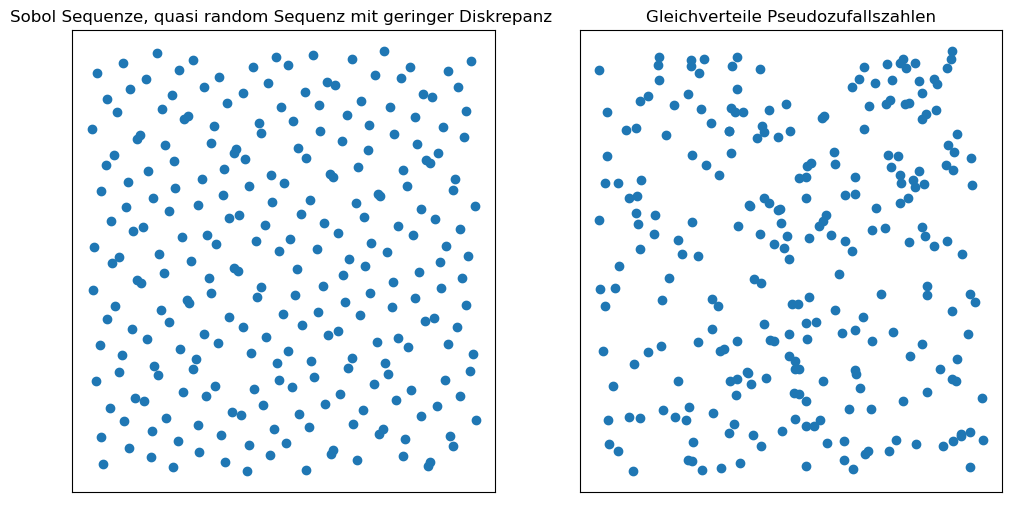

In [68]:

from scipy.stats import qmc
from scipy.stats import qmc

sampler = qmc.Sobol(d=2, )#scramble=False)
sample = sampler.random_base2(m=12)
print(qmc.discrepancy(sample))
_ = sampler.reset()
sample_continued = sampler.random_base2(m=8)
l_bounds = [0]
u_bounds = [10]
a = qmc.scale(sample_continued, l_bounds, u_bounds)

a1 = a[:,0]
a2 = a[:,1]

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
ax1.plot(a1, a2,'o')
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title('Sobol Sequenze, quasi random Sequenz mit geringer Diskrepanz ')
import random
it = len(a1)
b1 = [random.uniform(0,10) for _ in range(it)]
b2 = [random.uniform(0,10) for _ in range(it)]

ax2.plot(b1, b2, 'o')
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title('Gleichverteile Pseudozufallszahlen')

Text(0, 0.5, 'Fy [N]')

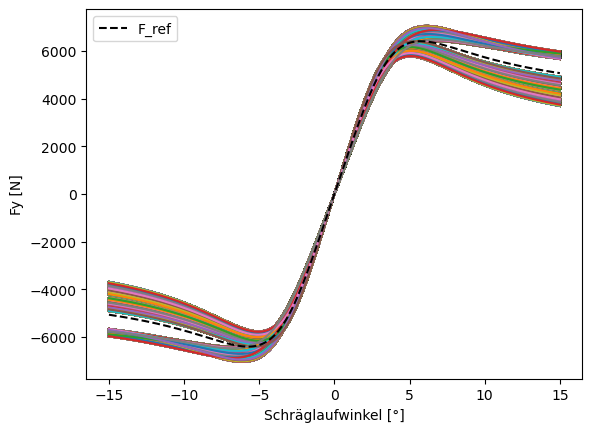

In [228]:

from scipy.stats import qmc
from scipy.stats import qmc

x=15
s=0.1
s1 = 0.0001
sampler = qmc.Sobol(d=1, )#scramble=False)
sample = sampler.random_base2(m=x)

_ = sampler.reset()
sample_continued = sampler.random_base2(m=x)
l_bounds = [-9.10763555 * (1+s)]
u_bounds = [-9.10763555 * (1-s)]
a = qmc.scale(sample_continued, l_bounds, u_bounds)



sampler = qmc.Sobol(d=1, )#scramble=False)
sample = sampler.random_base2(m=x)

_ = sampler.reset()
sample_continued = sampler.random_base2(m=x)
l_bounds = [1.5991035* (1-s)]
u_bounds = [1.5991035* (1+s)]
b = qmc.scale(sample_continued, l_bounds, u_bounds)



sampler = qmc.Sobol(d=1, )#scramble=False)
sample = sampler.random_base2(m=x)

_ = sampler.reset()
sample_continued = sampler.random_base2(m=x)
l_bounds = [-1.60244708* (1+s)]
u_bounds = [-1.60244708* (1-s)]
c = qmc.scale(sample_continued, l_bounds, u_bounds)


sampler = qmc.Sobol(d=1, )#scramble=False)
sample = sampler.random_base2(m=x)

_ = sampler.reset()
sample_continued = sampler.random_base2(m=x)
l_bounds = [-1.89562919* (1+s)]
u_bounds = [-1.89562919* (1-s)]
d = qmc.scale(sample_continued, l_bounds, u_bounds)
Sx = np.linspace(-1,1,300)
for i in range(0,len(a)):
    F = pa52.Pacejka5_lat_pa(Sy,Fz,a[i] ,b[i], c[i], d[i])
    plt.plot(Sy_plt,F)
F_ref = pa52.Pacejka5_lat_pa(Sy,Fz,-9.10763555 ,1.5991035, -1.60244708, -1.89562919)
plt.plot(Sy_plt,F_ref, 'k--', label = 'F_ref')
plt.legend()
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')

Text(0, 0.5, 'Fy [N]')

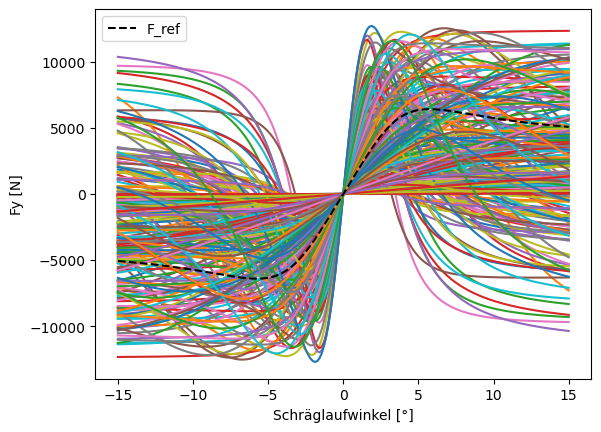

In [226]:

from scipy.stats import qmc
from scipy.stats import qmc

x=256
s=0.99
s1 = 0.0001
import random as random



for i in range(0,x):

    a=random.uniform(-9.10763555 * (1+s),-9.10763555 * (1-s))
    b=random.uniform(1.5991035* (1-s),1.5991035* (1+s))
    c=random.uniform(-1.60244708* (1+s),-1.60244708* (1-s))
    d=random.uniform(-1.89562919* (1+s),-1.89562919* (1-s))

    F = pa52.Pacejka5_lat_pa(Sy,Fz,a ,b, c, d)
    plt.plot(Sy_plt,F)
F_ref = pa52.Pacejka5_lat_pa(Sy,Fz,-9.10763555 ,1.5991035, -1.60244708, -1.89562919)
plt.plot(Sy_plt,F_ref, 'k--', label = 'F_ref')
plt.legend()
plt.xlabel('Schräglaufwinkel [°]')
plt.ylabel('Fy [N]')

